In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

In [291]:
from sklearn.datasets import load_boston

In [292]:
boston = load_boston()

In [293]:
df = pd.DataFrame(boston['data'], columns = boston.feature_names)

In [324]:
X = boston['data']
y = boston['target']

In [296]:
from sklearn.model_selection import train_test_split 

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=101)

In [298]:
steps = [
    ('scalar', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.01, fit_intercept=True, max_iter= 10000))
]

In [299]:
lasso_pipe = Pipeline(steps)

In [300]:
lasso_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [301]:
print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))

Training score: 0.9204269245480433
Test score: 0.8639861876903534


In [302]:
predictions = lasso_pipe.predict(X_test)
print('rmse {}' .format(sqrt(mean_squared_error(y_test,predictions))))

rmse 3.753372748020969


In [303]:
lasso_pipe.named_steps['model'].coef_

array([ 0.00000000e+00, -0.00000000e+00,  5.57382192e-02,  1.11001715e+00,
        0.00000000e+00, -1.40824800e+00,  2.60754387e+00, -9.35771222e-01,
       -2.42567351e+00,  6.32800136e-02, -0.00000000e+00, -3.86628718e-01,
        8.81981791e-01, -3.71686906e+00,  6.22738584e-02, -0.00000000e+00,
       -0.00000000e+00,  1.14362153e+00, -1.07520226e+00,  6.59091635e-01,
        0.00000000e+00, -0.00000000e+00, -6.41640561e-01,  0.00000000e+00,
       -0.00000000e+00, -1.51050849e-01,  6.49090716e-01, -2.17783329e-03,
       -2.02907087e-01, -2.97665543e-02, -0.00000000e+00,  3.43712190e-01,
       -5.29730412e-01, -5.26896173e-01, -0.00000000e+00,  1.30770460e+00,
        0.00000000e+00,  0.00000000e+00, -3.48649567e-01,  2.23476342e-01,
        2.00942326e-01,  2.63262236e+00,  0.00000000e+00,  2.76928597e-01,
        1.30616188e+00, -0.00000000e+00,  2.17313940e-01, -0.00000000e+00,
       -0.00000000e+00, -1.31074549e+00,  2.75781849e-01, -1.64590506e-01,
        3.72125824e-02, -

In [314]:
data = pd.DataFrame([predictions,y_test], index = ['predictions','y_test']).transpose()

In [316]:
data.head()

,predictions,y_test
0,46.631644,50.0
1,29.260410,36.2
2,17.020394,11.7
3,15.267935,14.9
4,28.443382,30.8


/home/mariza/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


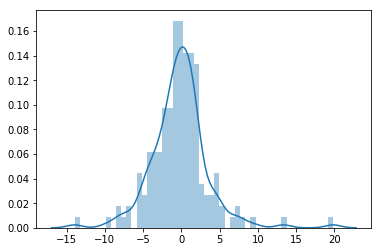

In [323]:
sns.distplot(predictions - y_test, bins = 50)